In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout
    

In [2]:
df=pd.read_csv('PYPL.csv') #loading my data

In [3]:
print(df.head()) #checking what does the data look like 

         Date       Open       High        Low      Close  Adj Close    Volume
0  2018-02-12  75.489998  76.279999  74.851997  75.279999  75.279999  10419600
1  2018-02-13  74.809998  75.599998  74.550003  74.970001  74.970001   7743600
2  2018-02-14  74.180000  77.360001  74.129997  77.269997  77.269997   8955800
3  2018-02-15  78.010002  78.300003  76.580002  78.294998  78.294998   9311000
4  2018-02-16  78.199997  78.750000  77.529999  78.370003  78.370003   9740300


In [4]:
X = df.drop(['Date','Close','Adj Close','Volume'], axis=1) #Featur data 
y = df['Close'] #label data

In [5]:
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns) # scaling the features 
X.head()

,Open,High,Low
0,0.030793,0.030919,0.035450
1,0.027979,0.028101,0.034185
2,0.025371,0.035394,0.032427
3,0.041223,0.039289,0.042685
4,0.042010,0.041153,0.046662


In [6]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False) # splitting the data 80% training and 20% testing 

In [7]:
#reshaping the features so that it can be applied to my model 
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [9]:
#creating my model 
model = Sequential()   
model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))  
model.add(Flatten())    
model.add(Dense(128, activation='relu'))
model.add(Dense(units = 1))
#compiling my model     
model.compile(loss='mean_squared_error', optimizer='adam')
    
    

In [10]:
#training the model 
model.fit(X_train, y_train, epochs=150, validation_split=0.2)

Epoch 1/150
26/26 [==============================] - 1s 7ms/step - loss: 20065.4062 - val_loss: 58515.5312
Epoch 2/150
26/26 [==============================] - 0s 2ms/step - loss: 17153.4121 - val_loss: 37287.3398
Epoch 3/150
26/26 [==============================] - 0s 2ms/step - loss: 5242.1177 - val_loss: 27.9017
Epoch 4/150
26/26 [==============================] - 0s 2ms/step - loss: 230.6290 - val_loss: 323.0936
Epoch 5/150
26/26 [==============================] - 0s 2ms/step - loss: 36.1442 - val_loss: 13.4573
Epoch 6/150
26/26 [==============================] - 0s 2ms/step - loss: 11.6814 - val_loss: 26.9030
Epoch 7/150
26/26 [==============================] - 0s 2ms/step - loss: 7.2712 - val_loss: 13.9875
Epoch 8/150
26/26 [==============================] - 0s 3ms/step - loss: 5.2370 - val_loss: 11.4569
Epoch 9/150
26/26 [==============================] - 0s 2ms/step - loss: 4.1910 - val_loss: 8.9504
Epoch 10/150
26/26 [==============================] - 0s 2ms/step - loss: 3.726

26/26 [==============================] - 0s 3ms/step - loss: 3.5554 - val_loss: 8.1515
Epoch 83/150
26/26 [==============================] - 0s 3ms/step - loss: 3.4888 - val_loss: 8.0916
Epoch 84/150
26/26 [==============================] - 0s 2ms/step - loss: 3.4473 - val_loss: 8.2385
Epoch 85/150
26/26 [==============================] - 0s 2ms/step - loss: 3.7666 - val_loss: 11.7864
Epoch 86/150
26/26 [==============================] - 0s 2ms/step - loss: 3.6377 - val_loss: 9.3329
Epoch 87/150
26/26 [==============================] - 0s 2ms/step - loss: 3.4574 - val_loss: 8.5215
Epoch 88/150
26/26 [==============================] - 0s 2ms/step - loss: 3.3899 - val_loss: 8.3377
Epoch 89/150
26/26 [==============================] - 0s 2ms/step - loss: 3.7021 - val_loss: 8.4508
Epoch 90/150
26/26 [==============================] - 0s 2ms/step - loss: 3.7218 - val_loss: 8.7075
Epoch 91/150
26/26 [==============================] - 0s 2ms/step - loss: 3.4958 - val_loss: 8.7976
Epoch 92/150

In [11]:
#trying to predict the value of close price using the x_test features 
pred_val = model.predict(X_test)

8/8 [==============================] - 0s 1ms/step


In [12]:
#Looking at the values my model preicted and the values of the already there from actual data 
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': pred_val.flatten()})
pred_df.head()

,Actual Value,Predicted Value
1005,120.260002,121.887505
1006,122.940002,122.874329
1007,119.019997,122.818916
1008,115.290001,119.279472
1009,114.120003,115.349571


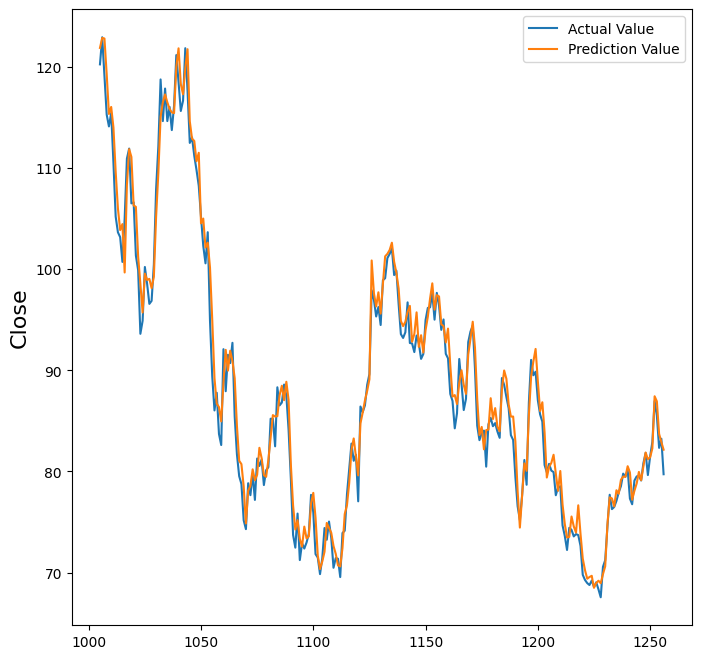

In [13]:
#plotting the predicted value and the actual value to evaluate how did my model do with prediction 
plt.figure(figsize=(8,8))
plt.ylabel('Close', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Prediction Value'])
plt.show()